## Binary Classification

### Introduction

CLassification problems are the most prevelant use cases you will encounter in the real world. Unlike regression, when the real numbered value is predicted, classification problems deal with associating an example to a category deals with associating an example to a category, they can be:

1. Predicting wheter a customer will buy the recommeded product;
2. Identify whether a credit transaction is fradulent;
3. Determining wheter a patient has a disease;
4. Analyzing images of animals and predicting whether the image is of a dog, cat or panda;
5. Analyzing text reviews and capturing the underlying emotion such as happiness, anger sorrow, or sarcasm

This preceding examples, theres a difference between the first, three and the last two. The first three revolve around binary decisions. The first three revolve around binary decisions.

* Customers can either buy the product or not.
* Credit card transactions can be fraudulent or legitimate.
* Patients can be diagnosed as positive or negative for a disease.

### Business Discovery
The first process when embarking on a data problem like the preceding is the business discovery process. This entails understanding various drivers influencing the business problem. Getting to know the business drivers is important as it will help in formulating hypotheses about the business problem, which can be verified during the exploratory data analysis (EDA). The verification of hypotheses will help in formulating intuitions for feature engineering, which will be critical for the veracity of the models that we build.


In [1]:
import pandas as pd
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'
bankData = pd.read_csv(file_url, sep = ';')
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
bankData.shape

(45211, 17)

In [3]:
bankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Visualization for EDA

Visualizations is imperative for EDA. Effective visualization helps me deriving business intuitions from the data. 
Let's see some techniques for EDA:

* **Line graphs**: Line graphs are one of the simplest forms of visualization. Line graphs are the preferred method for revealing trends in the data. These types of graphs are mostly used for continuous data.

![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/425/080/ad3/C15019_03_04.PNG)


* **Histograms**: Histograms are plots of the proportion of data along with some specified intervals. They are mostly used for visualizing the distribution of data. Histograms are very effective for identifying whether data distribution is symmetric and for identifying outliers in data. We will be looking at histograms in much more detail later in this chapter.

![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/fa2/7a6/bb0/C15019_03_05.png)


* **Density plots**: Like histograms, density plots are also used for visualizing the distribution of data. However, density plots give a smoother representation of the distribution. We will be looking at this later in this chapter.

![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/23d/b88/2bf/C15019_03_06.png)


* **Stacked bar charts**: A stacked bar chart helps you to visualize the various categories of data, one on top of the other, in order to give you a sense of proportion of the categories; for instance, if you want to plot a bar chart showing the values, Yes and No, on a single bar. This can be done using the stacked bar chart, which cannot be done on the other charts.

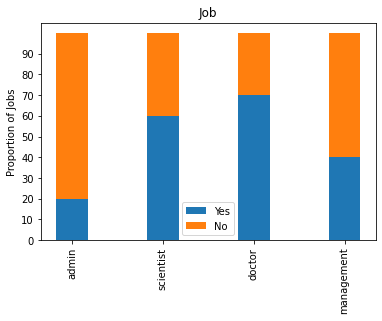

In [4]:
import matplotlib.pyplot as plt
import numpy as np

jobList = ['admin', 'scientist', 'doctor', 'management']

jobYes = [20,60,70,40]
jobNo = [80,40,30,60]
xlabels = len(jobList)
ind = np.arange(xlabels)

#Get width of each bar
width = 0.35
#Getting the plots

p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width, bottom = jobYes)
plt.ylabel('Proportion of Jobs')
plt.title('Job')
plt.xticks(ind, jobList)
plt.yticks(np.arange(0,100,10))
plt.legend((p1[0],p2[0]), ('Yes','No'))
plt.xticks(rotation = 90)
plt.show()

#### Business Hypothesis Testing for Age versus Propensity for a Term Loan

In [5]:
import pandas as pd
import altair as alt

In [6]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'
bankData = pd.read_csv(file_url, sep=";")

In [7]:
filter_mask = bankData['y'] == 'yes'
bankSub1 = bankData[filter_mask].groupby('age')['y'].agg(agegrp = 'count').reset_index()
bankSub1

,age,agegrp
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40
...,...,...
69,87,3
70,90,2
71,92,2
72,93,2


In [8]:
alt.Chart(bankSub1).mark_line().encode(x = 'age',y = 'agegrp')

alt.Chart(...)

From the plot, we can see that the highest number of term deposit purchases are done by customers within an age range between 25 and 40, with the propensity to buy tapering off with age. This relationship is quite counterintuitive from our assumptions in the hypothesis, right? But, wait a minute, aren't we missing an important point here? We are taking the data based on the absolute count of customers in each age range. If the proportion of banking customers is higher within the age range of 25 to 40, then we are very likely to get a plot like the one that we have got. What we really should plot is the proportion of customers, within each age group, who buy a term deposit. Let's look at how we can represent the data by taking the proportion of customers. Just like you did in the earlier steps, we will aggregate the customer propensity with respect to age, and then divide each category of buying propensity by the total number of customers in that age group to get the proportion.

In [9]:
## Getting another perspective
ageTot = bankData.groupby('age')['y'].agg(ageTot = 'count').reset_index()
ageTot.head()

,age,ageTot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129


In [10]:
# Getting all the details in one place
ageProp = bankData.groupby(['age','y'])['y'].agg(ageCat = 'count').reset_index()
ageProp.head()

,age,y,ageCat
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35


In [11]:
# Mergin both the data frames
ageComb = pd.merge(ageProp, ageTot, left_on = ['age'], right_on = ['age'])
ageComb['catProp'] = (ageComb.ageCat / ageComb.ageTot) * 100
ageComb.head()

,age,y,ageCat,ageTot,catProp
0,18,no,5,12,41.666667
1,18,yes,7,12,58.333333
2,19,no,24,35,68.571429
3,19,yes,11,35,31.428571
4,20,no,35,50,70.000000


In [12]:
alt.Chart(ageComb).mark_line().encode(x = 'age', y = 'catProp').facet(column = 'y')

alt.FacetChart(...)

###  Business Hypothesis Testing to Find Employment Status versus Propensity for Term Deposits
You are working as a data scientist for a bank. You are provided with historical data from the management of the bank and are asked to try to formulate a hypothesis between employment status and the propensity to buy term deposits.

We worked on a problem to find the relationship between age and the propensity to buy term deposits. In this activity, we will use a similar route and verify the relationship between employment status and term deposit purchase propensity.

The steps are as follows:
1. Formulate the hypothesis between employment status and the propensity for term deposits. Let the hypothesis be as follows: 2. High paying employees prefer term deposits than other categories of employees.
3. Open a Colab notebook file similar to what was used in Exercise 3.02, Business Hypothesis Testing for Age versus Propensity for a Term Loan and install and import the necessary libraries such as pandas and altair.
4. From the banking DataFrame, bankData, find the distribution of employment status using the .groupby(), .agg() and .reset_index() methods.
5. Group the data with respect to employment status using the .groupby() method and find the total count of propensities for each employment status using the .agg() method.

Now, merge both DataFrames using the pd.merge() function and then find the propensity count by calculating the proportion of propensity for each type of employment status. When creating the new variable for finding the propensity proportion.
Plot the data and summarize intuitions from the plot using matplotlib. Use the stacked bar chart for this activity.

In [13]:
import pandas as pd
import altair as alt 

In [14]:
# Hypothesis High paying employees prefer term deposits than ther categories

In [15]:
df = bankData.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 864x576 with 0 Axes>

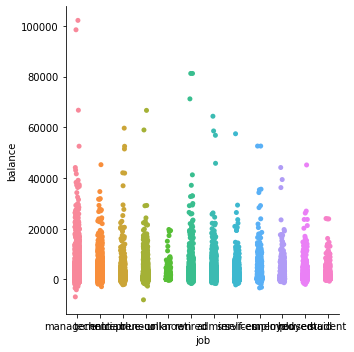

In [16]:
import seaborn as sns
plt.figure(figsize = (12,8))
sns.catplot(x = 'job', y = 'balance', data = df)
plt.show()

In [17]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [18]:
jobTot = df.groupby('job')['y'].agg(jobCount = 'count').reset_index()
jobTot

,job,jobCount
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


In [19]:
bankTot = df.groupby(['job', 'y'])['y'].agg(jobCat='count').reset_index()
bankTot

,job,y,jobCat
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364
5,entrepreneur,yes,123
6,housemaid,no,1131
7,housemaid,yes,109
8,management,no,8157
9,management,yes,1301


In [20]:
ageComb = pd.merge(ageProp, ageTot, left_on = ['age'], right_on = ['age'])
ageComb['catProp'] = (ageComb.ageCat / ageComb.ageTot) * 100
ageComb.head()

,age,y,ageCat,ageTot,catProp
0,18,no,5,12,41.666667
1,18,yes,7,12,58.333333
2,19,no,24,35,68.571429
3,19,yes,11,35,31.428571
4,20,no,35,50,70.000000


In [21]:
jobComb = pd.merge(jobTot, bankTot, on = ['job'],)
jobComb['catProp'] = (jobComb['jobCat'] / jobComb['jobCount'] * 100)
jobComb

,job,jobCount,y,jobCat,catProp
0,admin.,5171,no,4540,87.797331
1,admin.,5171,yes,631,12.202669
2,blue-collar,9732,no,9024,92.725031
3,blue-collar,9732,yes,708,7.274969
4,entrepreneur,1487,no,1364,91.728312
5,entrepreneur,1487,yes,123,8.271688
6,housemaid,1240,no,1131,91.209677
7,housemaid,1240,yes,109,8.790323
8,management,9458,no,8157,86.244449
9,management,9458,yes,1301,13.755551


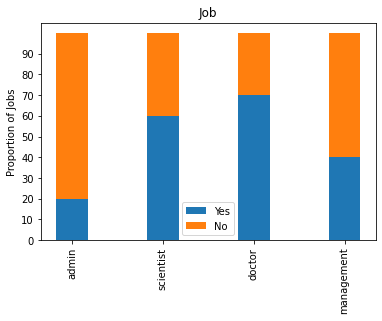

In [22]:
xlabels = len(jobList)
ind = np.arange(xlabels)

#Get width of each bar
width = 0.35
#Getting the plots

p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width, bottom = jobYes)
plt.ylabel('Proportion of Jobs')
plt.title('Job')
plt.xticks(ind, jobList)
plt.yticks(np.arange(0,100,10))
plt.legend((p1[0],p2[0]), ('Yes','No'))
plt.xticks(rotation = 90)
plt.show()

In [23]:
jobTot

,job,jobCount
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


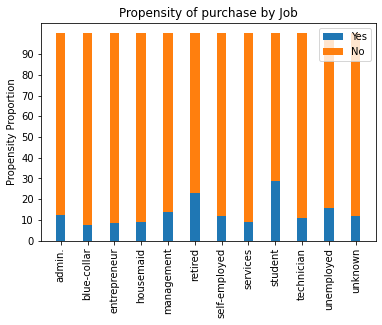

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Create seperate data frames for Yes and No
jobcombYes = jobComb[jobComb['y'] == 'yes']
jobcombNo = jobComb[jobComb['y'] == 'no']

# Get the length of the xaxis labels 
xlabels = jobTot['job'].nunique()

# Get the proportion values 
jobYes = jobcombYes['catProp'].unique()
jobNo = jobcombNo['catProp'].unique()

# Arrange the indexes of x asix
ind = np.arange(xlabels)

# Get the width of each bar
width = 0.35  

# Getting the plots
p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width,bottom=jobYes)

plt.ylabel('Propensity Proportion')
plt.title('Propensity of purchase by Job')

# Defining the x label indexes and y label indexes
plt.xticks(ind, jobTot['job'].unique())
plt.yticks(np.arange(0, 100, 10))

# Defining the legends
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

# To rotate the axis labels 
plt.xticks(rotation=90)
plt.show()

### Feature Engineering

Feature engineering is the process of transforming raw variables to create new variables, feature engineering is one the most important steps that influence of the models that we build.

Two broad types of feature engineering:
1. Here, we transform raw variables based on intuitions from a business perspective. These intutions are what we build during the exploratory analysis.

2. The transformation of raw variables is done from a statistical and data normalization perspective.

#### Business-Driven Feature Engineering

Business-driven feature engineering is the process of transforming raw variables based on business intuitions that were derived during the exploratory analysis. It entails transforming data and creating new variables based on business factors or drivers that influence a business problem. 

In [25]:
import pandas as pd
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'
bankData = pd.read_csv(file_url, sep = ';')
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [26]:
#relationship between housing and propensity for term deposits
bankData.groupby(['housing','y'])['y'].agg(houseTot = 'count').reset_index()

,housing,y,houseTot
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


In [27]:
# Relationship between having a loan and propensity for term deposits
bankData.groupby(['loan','y'])['y'].agg(loanTot = 'count').reset_index()

,loan,y,loanTot
0,no,no,33162
1,no,yes,4805
2,yes,no,6760
3,yes,yes,484


In [28]:
#Taking the quantiles for 25%, 50% and 75% of the balance data
import numpy as np
np.quantile(bankData['balance'], [0.25,0.5,0.75])

array([  72.,  448., 1428.])

In [29]:
#Now, convert the numerical values of bank balances into categorical values, as mentioned in the following code snippet:
bankData['balanceClass'] = 'Quant1'
bankData.loc[(bankData['balance'] > 72) & (bankData['balance'] > 448), 'balanceClass'] = 'Quant2'
bankData.loc[(bankData['balance'] > 448) & (bankData['balance'] > 1428), 'balanceClass'] = 'Quant3'
bankData.loc[(bankData['balance'] > 1428), 'balanceClass'] = 'Quant4'
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1


In [30]:
#Calculating the customers under each quantile
balanceTot = bankData.groupby(['balanceClass'])['y'].agg(balanceTot = 'count').reset_index()
balanceTot

,balanceClass,balanceTot
0,Quant1,22608
1,Quant2,11306
2,Quant4,11297


In [31]:
# Calculating the total customers categorised as per quantile and propensity classification
balanceProp = bankData.groupby(['balanceClass', 'y'])['y'].agg(balanceCat='count').reset_index()
balanceProp

,balanceClass,y,balanceCat
0,Quant1,no,20559
1,Quant1,yes,2049
2,Quant2,no,9891
3,Quant2,yes,1415
4,Quant4,no,9472
5,Quant4,yes,1825


In [32]:
# Merging both the data frames
balanceComb = pd.merge(balanceProp, balanceTot, on = ['balanceClass'])
balanceComb['catProp'] = (balanceComb.balanceCat / balanceComb.balanceTot)*100
balanceComb

,balanceClass,y,balanceCat,balanceTot,catProp
0,Quant1,no,20559,22608,90.936837
1,Quant1,yes,2049,22608,9.063163
2,Quant2,no,9891,11306,87.484521
3,Quant2,yes,1415,11306,12.515479
4,Quant4,no,9472,11297,83.845269
5,Quant4,yes,1825,11297,16.154731


In [33]:
# Normalizing data
from sklearn.preprocessing import MinMaxScaler
X = bankData[['balance']].astype(float)
scalar = MinMaxScaler()
bankData['balanceTran'] = scalar.fit_transform(X)

In [34]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092259
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073067
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072822
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086476
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072812


The purpose of normalization is to bring all of the variables that we are using to create the new feature into a common scale.

In [35]:
#Adding a small numerical constant to eliminate 0  values

bankData['balanceTran'] = bankData['balanceTran'] + 0.00001

In [36]:
bankData['loanTran'] = 1
#Giving a weight of 5 if there is no loan
bankData.loc[bankData['loan'] == 'no','loanTran'] = 5
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5


In [37]:
#Transform values for housing data
bankData['houseTran'] = 5
#Give a weight of 1 if the customer does not have a house
bankData.loc[bankData['housing'] == 'no', 'houseTran'] = 1
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5,1


In [38]:
#Let us create the new variable which is a product of all these
bankData['assetIndex'] = bankData['balanceTran'] * bankData['loanTran'] * bankData['houseTran']
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112


In [39]:
# Explore the propensity with respect to the compostie index
np.quantile(bankData['assetIndex'], 
            [0.25,0.50,0.75])

array([0.37668646, 0.56920367, 1.9027249 ])

In [40]:
bankData['assetClass'] = 'Quant1'
bankData.loc[(bankData['assetIndex'] > 0.38) & (bankData['assetIndex'] < 0.57), 'assetClass'] = 'Quant2'
bankData.loc[(bankData['assetIndex'] > 0.57) & (bankData['assetIndex'] < 1.9), 'assetClass'] = 'Quant3'
bankData.loc[(bankData['assetIndex'] > 1.9,'assetClass')] = 'Quant4'
bankData.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112,Quant1


In [41]:
#Calculating total of each asset class
assetTot = bankData.groupby('assetClass')['y'].agg(assetTot = 'count').reset_index()
#Calculating the category wise
assetProp = bankData.groupby(['assetClass','y'])['y'].agg(assetCat = 'count').reset_index()

In [42]:
# Merging both data frames
assetComb = pd.merge(assetProp, assetTot, on = ['assetClass'])
assetComb['catProp'] = (assetComb.assetCat / assetComb.assetTot) * 100
assetComb

,assetClass,y,assetCat,assetTot,catProp
0,Quant1,no,10921,12212,89.428431
1,Quant1,yes,1291,12212,10.571569
2,Quant2,no,8436,10400,81.115385
3,Quant2,yes,1964,10400,18.884615
4,Quant3,no,10144,11121,91.214819
5,Quant3,yes,977,11121,8.785181
6,Quant4,no,10421,11478,90.791079
7,Quant4,yes,1057,11478,9.208921


### Data-Driven Feature Engineering



#### Quick Peek at Data Types and Descriptive Summary

Looking at the data types such as categorical or numeric and then deriving summary statistics is a good way to take a quick peek into data befoe you do some of the downstream feature engineering steps.


In [43]:
# Looking at Data types
print(bankData.dtypes)
#Looking at descriptive statistics
print(bankData.describe())

age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y                object
balanceClass     object
balanceTran     float64
loanTran          int64
houseTran         int64
assetIndex      float64
assetClass       object
dtype: object
                age        balance  ...     houseTran    assetIndex
count  45211.000000   45211.000000  ...  45211.000000  45211.000000
mean      40.936210    1362.272058  ...      3.223353      1.179189
std       10.618762    3044.765829  ...      1.987511      0.952080
min       18.000000   -8019.000000  ...      1.000000      0.000010
25%       33.000000      72.000000  ...      1.000000      0.376686
50%       39.000000     44

The purpose of a descriptive summary isto get a quick feel of the data with respect to the distribution and some basic statistics such as mean and standard deviation. Getting a perspective on the summary statistics is critical to thinking about what kind of transformation are required for each variable.

#### Correlation Matrix and Visualization
Correlation, as you know, is a measure that indicates how two variables fluctuate together. Any correlaiton value of 1, or near 1, indicates that those variables are highly correlated. Highly correlated variables can sometimes be damaging for the veracity of models, and, in many circumstances, we make the decision to eliminate such variables or combine them to form composite or interactive variables.

##### Find correlation in data to generate a correlation plot using bank data



In [44]:
import pandas as pd
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'
bankData = pd.read_csv(file_url, sep=";")

In [45]:
from pandas import set_option

In [46]:
bankNumeric = bankData[['age','balance','day','duration','campaign','pdays','previous']]

In [47]:
set_option('display.width', 150)
set_option('precision',3)
bankCorr = bankNumeric.corr(method = 'pearson')
bankCorr

,age,balance,day,duration,campaign,pdays,previous
age,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001
balance,0.098,1.000,0.005,0.022,-0.015,0.003,0.017
day,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052
duration,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001
campaign,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033
pdays,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455
previous,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000


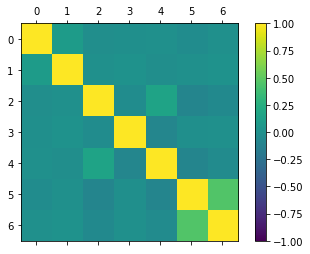

In [48]:
import matplotlib.pyplot as plt
corrFig = plt.figure()
figAxis = corrFig.add_subplot(111)
corAx = figAxis.matshow(bankCorr, vmin = -1, vmax = 1)
corrFig.colorbar(corAx)
plt.show()

### Skewness 
Skewness is another area for feature engineering. Skewed data means data that is shifted in one direction or other. Skewness can cause machine learning models to underperform.

Many machine learning models assume normally distributed data or data structures to follow the gaussian structure. Any deviation from the assumed Gaussian structure, can effect the model performace.
It is very effective where we can apply feature engineering by looking at the skewness of data and correcting the skewness through normalization.
Skewness can be visualized by plotting the data using histograms and density plots.

In [49]:
#Skewness of numeric attributes
bankNumeric.skew()

age          0.685
balance      8.360
day          0.093
duration     3.144
campaign     4.899
pdays        2.616
previous    41.846
dtype: float64

The preceding matrix is the skewness index. Any value closer to **0** indicates a low degree of skewness. Positive values indicate right skew and negative values, left skew.

Variables that show higher values of right/left skew are candidates for futher engineering by normalization.

#### Histograms

Histogram are an effective way to plot the distribution of data nad to identify skewness in data.

Example:

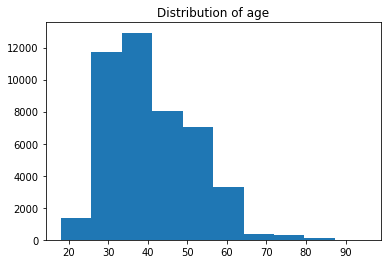

In [50]:
fig, ax = plt.subplots()
ax.hist(bankNumeric['age'])
ax.set_title('Distribution of age')
plt.show()


We can see that the age variable, has a distribution closer to the bell curve with a lower degree of skewness.

#### Density Plots
Density Plots help me in visualizing the distribution of data.
A density plot can be created using the **kind == 'density'** parameter.

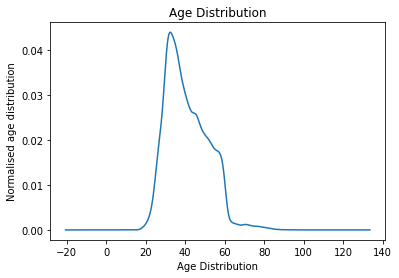

In [51]:
#Density Plot
bankNumeric['age'].plot(kind = 'density', subplots = False, layout = (1,1))
plt.title('Age Distribution')
plt.xlabel("Age Distribution")
plt.ylabel('Normalised age distribution')
plt.show()

Density plots help in getting a smoother visualization of the distribution of the data. From density plot of Age, we can see that it has a distribution similiar to bell curve.

### Other Feature Engineering Methods

We will now look into some similitar transformation techiniques, namely standard scaler and normalizer.

Standard scaler standardizes data to a mean of 0 and stardard deviation of 1. The mean is the average of the data and the standard deviation is a measure of the spread of data. By standardizing the same mean and the std, comparision across diferrent distributions is enable.

The normalizer function normalizes the length of the data. This means that each value in rows is divided by the normalization of the row vector to normalize the row. The normalizer function is applied on the rows while stnadard scaler is applied to columns.

THe normalizer and standard scaler functions are importante to feature engineering steps applied to the data before downstream modelling steps.

In [52]:
#Standardize data (0 mean, 1std)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

scaler = StandardScaler()
rescaledNum = scaler.fit_transform(bankNumeric)
set_printoptions(precision = 3)
print(rescaledNum)

[[ 1.607  0.256 -1.298 ... -0.569 -0.411 -0.252]
 [ 0.289 -0.438 -1.298 ... -0.569 -0.411 -0.252]
 [-0.747 -0.447 -1.298 ... -0.569 -0.411 -0.252]
 ...
 [ 2.925  1.43   0.143 ...  0.722  1.436  1.05 ]
 [ 1.513 -0.228  0.143 ...  0.399 -0.411 -0.252]
 [-0.371  0.528  0.143 ... -0.247  1.476  4.524]]


In [53]:
#Normalized Data (lenght of 1)
from sklearn.preprocessing import Normalizer

normaliser = Normalizer()
normalisedNum = normaliser.fit_transform(bankNumeric)
set_printoptions(precision = 3)
print(normalisedNum)

[[ 2.686e-02  9.923e-01  2.315e-03 ...  4.630e-04 -4.630e-04  0.000e+00]
 [ 2.750e-01  1.812e-01  3.125e-02 ...  6.249e-03 -6.249e-03  0.000e+00]
 [ 3.974e-01  2.408e-02  6.021e-02 ...  1.204e-02 -1.204e-02  0.000e+00]
 ...
 [ 1.235e-02  9.805e-01  2.917e-03 ...  8.579e-04  3.157e-02  5.147e-04]
 [ 6.775e-02  7.940e-01  2.021e-02 ...  4.754e-03 -1.189e-03  0.000e+00]
 [ 1.234e-02  9.906e-01  5.668e-03 ...  6.669e-04  6.269e-02  3.668e-03]]


The output from standard scaler is normalized along the columns. The output would have 11 columns correspoding to 11 numeric columns (age, balance, day, duration ...)
If we observed the output, we can see that each value along a column is normalized so as to have mean of 0 and standard deviation of 1.

For instance, in the age variable, we have data ranging from 18 up to 95. In contrast, for the balance data, we have data ranging from -8,019 to 102,127. We can see that both of these variables have different ranges of data that cannot be compared. The standard scaler function converts these data points at very different scales into a common scale so as to compare the distribution of data. Normalizer rescales each row so as to have a vector with a length of 1.

#### Which One to use

Which one we use...
Many machine learning algorithms converge faster when the feature are in similar scale or normally distributed. Standardizing is more useful in algorithms that assume input variables to have a Gaussian Structure. Algorithms such linear regression, logistic regression and Linear Discriminate Analysis (LDA) fall under this genre, Gaussian Structures.

Normalization techniques would be more congenial for sparse datasets, datasets with a lot of zeros, whwen using algorithms such as knn or neural networks.

### Building a Binary Classification Model using the Logistic Regression Function

The essence of data science is about mapping a business problem into its data elements and then transforming those data elements to get our desired business outcomes.

By now, you may have realized that the goal of machine learning is to estimate a mapping function (f) between an output variable and input variables. In mathematical form, this can be written as follows:

![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/bea/5a3/ec4/C15019_03_35.png)

**Y** is the dependent variable, which is our prediction as to wheter a costumer has the probability to buy a term deposit or not.

**X**  is the independent variable(s), which are those attributes such as age, education, and maritial status are part of the dataset.

**f()** is a function that connect various attributes of the data to the probability. This function is a combination of different coefficients or parameters applied to each of the attributes to get the probability of term deposit purchases, our problem in this notebook.

For simplicity, let's assume that we have only two attributes, age and bank balance. Using these, we have to predict whether a customer is likely to buy a term deposit or not. Let the age be 40 years and the balance $1,000. With all of these attribute values, let's assume that the mapping equation is as follows:

![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/83b/f40/a7f/C15019_03_36.png)

Using this equation, we get the following:


```
Y = 0.1 + 0.40 * 40 + 0.002 * 1000
Y = 18.1
```

Now, you might be wondering, we are getting a real number and how does this represent a decision of whether a customer will buy a term deposit or not. This is where the concept of a decision boundary comes in. Let's also assume that, on analyzing the data, we have also identified that if the value of Y goes above 15 (an assumed value in this case), then the customer is likely to buy the term deposit, otherwise they will not buy a term deposit. This means that, as per this example, the customer is likely to buy a term deposit.

Let's now look at the dynamics in this example and try to decipher the concepts. The values such as 0.1, 0.4, and 0.002, which are applied to each of the attributes, are the coefficients. These coefficients, along with the equation the connecting the coefficients and the variables, are the function that we're learning from the data. The **essence** of machine learning is to learn all of these from the provided data, these coefficients along with the functions can also be called by another common named called **model**, a model is an approximation of the data generation process. During the machine learning, we are trying to get as close to the real modelk that the generate the data we are analyzing.


ML models can be broadly classified into two types, parametric models and non-parametric models. Parametric models are where we assume the form of the function we are trying to learn and then learn coefficients from the training data. By assuming a form for the function, we can see as example for Parametric model a **Linear Regression function**.
![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/ccc/9db/9ef/C15019_03_37.png)

The terms C0, M1, and M2 are the coefficients of the line that influences the intercept and slope of the line. X1 and X2 are the input variables. What we are doing here is that we assume that the data generating model is a linear model and then, using the data, we estimate the coefficients, which will enable the generation of the predictions. By assuming the data generating model, we have simplified the whole learning process. However, these simple processes also come with their pitfalls. Only if the underlying function is linear or similar to linear will we get good results. If the assumptions about the form are wrong, we are bound to get bad results.

Other examples include:
 * Linear and Logistic Regression
 * Naive Bayes
 * Linear Support Vector Machines
 * Perceptron


 Machine Learning do not make strong assumptions on the function are called non-parametric models. In the absence of an assumed form, non-parametric models are free to learn any functional form from the data. Also generally require a lot of training data to estimate the underlying function. Examples:

 * Decision Trees
 * K-nearest neighbors
 * Neural Networks
 * SVM with Gaussian kernels



### Logistic Regression Demystified
Logistic Regression is a linear model similar to the linear regression, At the core of logistic regression is the sigmoid function, wich quashes any real-valued number to a value between 0 and 1. The mathematical equation for a logistic regression can be written as follow:

![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/3c3/9cd/6e9/C15019_03_38.png)

Here, **Y** is the probability.
The terms C0 + M1 * X1 + M2 * X2 are very similar to the ones we have seen in the linear regression function, covered in an earlier chapter. As you would have learned by now, a linear regression function gives a real-valued output. To transform the real-valued output into a probability, we use the logistic function, which has the following form:
![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/138/a5a/7e3/C15019_03_39.png)

Here, *e* is the natural logarithm.

### Metrics for Evaluating Model Performace.

These evaluations are done based on various metrics on the prediction.



#### Confusion Matrix
We evaluate a model based on its performace on the test set. A test set will have it's labels, which we call the ground truth, using the model we also generate predictions for the test set. The evaluation of a model performace is all about comparion the ground truth and the predictions.

As dummy example:

![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/da3/af8/349/C15019_03_42.png)

The preceding table shows a dummy dataset with seven examples. The second column is the ground truth, which are the actual labels, and the third column contains the results of our predictions. From the data, we can see that four have been correctly classified and three were misclassified.

A confusion matrix generates the resultant comparison between prediction and ground truth, as represented in the following table:

![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/2f3/643/f25/C15019_03_43.PNG)

As you can see from the table, there are five examples whose labels (ground truth) are Yes and the balance is two examples that have the labels of No.

The first row of the confusion matrix is the evaluation of the label Yes. True positive shows those examples whose ground truth and predictions are Yes (examples 1, 3, and 5). False negative shows those examples whose ground truth is Yes and who have been wrongly predicted as No (examples 2 and 7).

Similarly, the second row of the confusion matrix evaluates the performance of the label No. False positive are those examples whose ground truth is No and who have been wrongly classified as Yes (example 6). True negative examples are those examples whose ground truth and predictions are both No (example 4).

The generation of a confusion matrix is used for calculating many of the matrices such as accuracy and classification reports, which are explained later. It is based on metrics such as accuracy or other detailed metrics shown in the classification report such as precision or recall the models for testing. We generally pick models where these metrics are the highest.

#### Accuracy

Accuracy is the first level of the evaluation, which we will resort to in order to have a quick check on model performace. Referring to the confusion matrix, accuracy can be represented as follow:
![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/9a6/3b0/00e/C15019_03_44.png)

Accuracy is the proportion of correct predictions out of all of the predictions.


#### Classification Report
A classification report outputs three key metrics: precision, recall and the F1-score.

**Precision**: Precision is the ration of the true positives to the sum of true positives and false positives:

![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/212/6b9/995/C15019_03_45.png)

Precision is the indicator that tells you, out of all the positives that were predicted, how many were true positives.

**Recall**: Recall is the ratio of the true positives to the sum of true positives and false negatives
![texto alternativo](https://s3.amazonaws.com/thinkific/file_uploads/59347/images/b39/644/758/C15019_03_46.png)
Recall manifests the ability of the model to identify all true positives.

**F1 Score**: F1-Score is a weighted score of both precision and recall. F1 score of **1** indicates the best performace and **0** indicates the worst performace.



### Logistic Regression Model for Predicting the Propensity of Term Deposi Purchase in a Bank

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [55]:
bankData.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [58]:
# Converting all the categorical variables to dummy variables

bankCat = pd.get_dummies(bankData[['job','marital','education','default','housing', 'loan','contact','month','poutcome']])
bankCat.shape

(45211, 44)

In [59]:
bankNum = bankData[['age','balance','day','duration','campaign','pdays','previous']]
bankNum.shape

(45211, 7)

In [60]:
#Preparing the X variables
X = pd.concat([bankCat, bankNum],axis = 1)
print(X.shape)
Y = bankData['y']
print(Y.shape)
X.head()

(45211, 51)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,58,2143,5,261,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,44,29,5,151,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,33,2,5,76,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,47,1506,5,92,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,33,1,5,198,1,-1,0


In [61]:
#SPlitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state = 123)

In [62]:
bankModel = LogisticRegression()
bankModel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
pred = bankModel.predict(X_test)
print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(bankModel.score(X_test, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.89


In [64]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[11754   244]
 [ 1242   324]]


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11998
         yes       0.57      0.21      0.30      1566

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



From the metrics, we can see that, out of the total 11,969 examples of no, 11,640 were correctly classified as no and the balance, 329, were classified as yes. This gives a recall value of 11,640/11,969, which is nearly 97%. From a precision perspective, out of the total 12,682 examples that were predicted as no, only 11,640 of them were really no, which takes our precision to 11,640/12,682 or 92%.

However, the metrics for yes give a different picture. Out of the total 1,595 cases of yes, only 553 were correctly identified as yes. This gives us a recall of 553/1,595 = 35%. The precision is 553 / (553 + 329) = 62%.

From an overall accuracy level, this can be calculated as follows: correctly classified examples / total examples = (11640 + 553) / 13564 = 90%.

The metrics might seem good when you look only at the accuracy level. However, looking at the details, we can see that the classifier, in fact, is doing a poor job of classifying the yes cases. The classifier has been trained to predict mostly no values, which from a business perspective is useless. From a business perspective, we predominantly want the yes estimates, so that we can target those cases for focused marketing to try to sell term deposits. However, with the results we have, we don't seem to have done a good job in helping the business to increase revenue from term deposit sales.

In this exercise, we have preprocessed data, then we performed the training process, and finally, we found useful prediction, analysis of metrics, and deriving strategies for further improvement of the model.

What we have now built is the first model or a benchmark model. The next step is to try to improve on the benchmark model through different strategies. One such strategy is to feature engineer variables and build new models with new features. Let's achieve that in the next activity.

###Model Iteration 2 – Logistic Regression Model with Feature Engineered Variables

In [66]:
import pandas as pd
import numpy as np

In [67]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'
bankData = pd.read_csv(file_url, sep = ';')

In [68]:
# Normalizing data
from sklearn import preprocessing
x = bankData[['balance']].values.astype(float)

In [71]:
minmaxScaler = preprocessing.MinMaxScaler()
bankData['balanceTran'] = minmaxScaler.fit_transform(x)
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.092
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.073
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.073
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.086
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.073


In [73]:
#Adding a small numerical constant to eliminate 0 values
bankData['balanceTran'] = bankData['balanceTran'] + 0.00001

In [74]:
# Let us transform values for loan data
bankData['loanTran'] = 1
# Giving a weight of 5 if there is no loan
bankData.loc[bankData['loan'] == 'no', 'loanTran'] = 5
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceTran,loanTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.092,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.073,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.073,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.086,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.073,5


In [75]:
bankData['houseTran'] = 5

In [76]:
bankData.loc[bankData['housing'] == 'no', 'houseTran'] = 1
print(bankData.head())

   age           job  marital  education  ...   y  balanceTran loanTran houseTran
0   58    management  married   tertiary  ...  no        0.092        5         5
1   44    technician   single  secondary  ...  no        0.073        5         5
2   33  entrepreneur  married  secondary  ...  no        0.073        1         5
3   47   blue-collar  married    unknown  ...  no        0.086        5         5
4   33       unknown   single    unknown  ...  no        0.073        5         1

[5 rows x 20 columns]


In [77]:
bankData['assetIndex'] = bankData['balanceTran'] * bankData['loanTran'] * bankData['houseTran']
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceTran,loanTran,houseTran,assetIndex
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.092,5,5,2.307
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.073,5,5,1.827
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.073,1,5,0.364
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.086,5,5,2.162
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.073,5,1,0.364


In [78]:
np.quantile(bankData['assetIndex'],[0.25,0.5,0.75])

array([0.377, 0.569, 1.903])

In [79]:
bankData['assetClass'] = 'Quant1'
bankData.loc[(bankData['assetIndex'] > 0.38) & (bankData['assetIndex'] < 0.57), 'assetClass'] = 'Quant2'
bankData.loc[(bankData['assetIndex'] > 0.57) & (bankData['assetIndex'] < 1.9), 'assetClass'] = 'Quant3'
bankData.loc[bankData['assetIndex'] > 1.9, 'assetClass'] = 'Quant4'
bankData.head()
bankData.assetClass[bankData['assetIndex'] > 1.9] = 'Quant4'
bankData.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.092,5,5,2.307,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.073,5,5,1.827,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.073,1,5,0.364,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.086,5,5,2.162,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.073,5,1,0.364,Quant1


In [81]:
# Calculating total of each asset class
assetTot = bankData.groupby('assetClass')['y'].agg(assetTot='count').reset_index()
# Calculating the category wise counts
assetProp = bankData.groupby(['assetClass', 'y'])['y'].agg(assetCat='count').reset_index()

In [82]:
assetComb = pd.merge(assetProp, assetTot, on = ['assetClass'])
assetComb['catProp'] = (assetComb.assetCat / assetComb.assetTot)*100
assetComb

,assetClass,y,assetCat,assetTot,catProp
0,Quant1,no,10921,12212,89.428
1,Quant1,yes,1291,12212,10.572
2,Quant2,no,8436,10400,81.115
3,Quant2,yes,1964,10400,18.885
4,Quant3,no,10144,11121,91.215
5,Quant3,yes,977,11121,8.785
6,Quant4,no,10421,11478,90.791
7,Quant4,yes,1057,11478,9.209


In [83]:
bankData

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.092,5,5,2.307,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.073,5,5,1.827,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.073,1,5,0.364,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.086,5,5,2.162,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.073,5,1,0.364,Quant1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,0.080,5,1,0.402,Quant2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,0.089,5,1,0.443,Quant2
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,0.125,5,1,0.623,Quant3
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0.079,5,1,0.394,Quant2


In [84]:
bankCat1 = pd.get_dummies(bankData[['job','marital','education','default','contact','month','poutcome']])
bankNum1 = bankData[['age','day','duration','campaign','pdays','previous','assetIndex']]
bankNum1.head()

,age,day,duration,campaign,pdays,previous,assetIndex
0,58,5,261,1,-1,0,2.307
1,44,5,151,1,-1,0,1.827
2,33,5,76,1,-1,0,0.364
3,47,5,92,1,-1,0,2.162
4,33,5,198,1,-1,0,0.364


In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

ageT1 = bankNum1[['age']].values.astype(float)
dayT1 = bankNum1[['day']].values.astype(float)
durT1 = bankNum1[['duration']].values.astype(float)

bankNum1['ageTran'] = scaler.fit_transform(ageT1)
bankNum1['dayTran'] = scaler.fit_transform(dayT1)
bankNum1['durTran'] = scaler.fit_transform(durT1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [87]:
bankNum2 = bankNum1[['ageTran','dayTran','durTran','campaign','pdays','previous','assetIndex']]

bankNum2.head()

,ageTran,dayTran,durTran,campaign,pdays,previous,assetIndex
0,0.519,0.133,0.053,1,-1,0,2.307
1,0.338,0.133,0.031,1,-1,0,1.827
2,0.195,0.133,0.015,1,-1,0,0.364
3,0.377,0.133,0.019,1,-1,0,2.162
4,0.195,0.133,0.040,1,-1,0,0.364


In [88]:
# Preparing the X variables
X = pd.concat([bankCat1, bankNum2], axis=1)
print(X.shape)
# Preparing the Y variable
Y = bankData['y']
print(Y.shape)
X.head()


(45211, 47)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ageTran,dayTran,durTran,campaign,pdays,previous,assetIndex
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.519,0.133,0.053,1,-1,0,2.307
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.338,0.133,0.031,1,-1,0,1.827
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.195,0.133,0.015,1,-1,0,0.364
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.377,0.133,0.019,1,-1,0,2.162
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.195,0.133,0.040,1,-1,0,0.364


In [91]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

# Defining the LogisticRegression function
bankModel = LogisticRegression()
bankModel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
pred = bankModel.predict(X_test)
print('Accuracy of Logisticr regression model prediction on test set: {:.2f}'.format(bankModel.score(X_test, y_test)))


Accuracy of Logisticr regression model prediction on test set: 0.89


In [93]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[11758   240]
 [ 1198   368]]


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94     11998
         yes       0.61      0.23      0.34      1566

    accuracy                           0.89     13564
   macro avg       0.76      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564

